In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from os import listdir
from os.path import isfile, join
import re
import os
import imageio


In [2]:
directory_path = "/tmp/test_num_points/"

list_spots = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and re.match(r'[0-9]+.*\.json', f))]


In [3]:
import json 

metrics = []
date = []
lat = []
long = []

for image_json in list_spots: 
         
    try: 
        with open(directory_path+image_json) as f:
            d = json.load(f)
            metrics.append(d)
    except:
        print ('Issue with file',image_json)
        continue
    
data_df = pd.DataFrame.from_dict(metrics)

  

In [4]:
data_df.head()

,date,latitude,longitude,mean,offset,offset50,slope,std
0,2016-05-06,27.961364,11.613182,-284.50,-674.0,NaN,-33.70,221.866739
1,2016-03-31,27.984091,11.531364,-37.95,-85.0,NaN,-4.25,39.654098
2,2016-03-31,27.984091,11.585909,-217.40,-518.0,-288.0,-25.90,176.959995
3,2016-06-11,27.920455,11.576818,0.00,0.0,NaN,0.00,0.000000
4,2016-05-06,27.961364,11.567727,-175.85,-412.0,NaN,-20.60,148.236391


In [5]:
import numpy as np
np.unique(data_df['date'])

array(['2016-01-19', '2016-02-24', '2016-03-31', '2016-05-06',
       '2016-06-11', '2016-11-28'], dtype=object)

In [6]:
data_df['latitude'] = data_df['latitude'].astype(float)
data_df['longitude'] = data_df['longitude'].astype(float)

In [7]:
data_df["year"]= data_df["date"].str.slice(0, 4, 1) 
data_df["year"].astype(int).head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: year, dtype: int64

In [8]:
data_df.head()

,date,latitude,longitude,mean,offset,offset50,slope,std,year
0,2016-05-06,27.961364,11.613182,-284.50,-674.0,NaN,-33.70,221.866739,2016
1,2016-03-31,27.984091,11.531364,-37.95,-85.0,NaN,-4.25,39.654098,2016
2,2016-03-31,27.984091,11.585909,-217.40,-518.0,-288.0,-25.90,176.959995,2016
3,2016-06-11,27.920455,11.576818,0.00,0.0,NaN,0.00,0.000000,2016
4,2016-05-06,27.961364,11.567727,-175.85,-412.0,NaN,-20.60,148.236391,2016


In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt


In [10]:
geometry = [Point(xy) for xy in zip(data_df.longitude, data_df.latitude)]
data_df['geometry'] = geometry


In [11]:
data_df.head()

,date,latitude,longitude,mean,offset,offset50,slope,std,year,geometry
0,2016-05-06,27.961364,11.613182,-284.50,-674.0,NaN,-33.70,221.866739,2016,POINT (11.61318181818182 27.96136363636364)
1,2016-03-31,27.984091,11.531364,-37.95,-85.0,NaN,-4.25,39.654098,2016,POINT (11.53136363636364 27.98409090909091)
2,2016-03-31,27.984091,11.585909,-217.40,-518.0,-288.0,-25.90,176.959995,2016,POINT (11.58590909090909 27.98409090909091)
3,2016-06-11,27.920455,11.576818,0.00,0.0,NaN,0.00,0.000000,2016,POINT (11.57681818181818 27.92045454545455)
4,2016-05-06,27.961364,11.567727,-175.85,-412.0,NaN,-20.60,148.236391,2016,POINT (11.56772727272727 27.96136363636364)


In [12]:
crs = {'init': 'epsg:4326'}
data_geo_pd = gpd.GeoDataFrame(data_df, crs=crs, geometry=geometry)

NameError: name 'imageio' is not defined

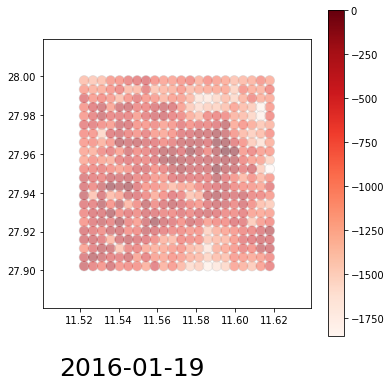

In [13]:
import numpy as np

vmin = min(data_df['offset'])
vmax = max(data_df['offset'])

list_of_years = np.unique(data_geo_pd['date'])
# start the for loop to create one map per year

images = []

for year in list_of_years:
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(6, 6))


    data_geo_pd[data_geo_pd['date']==year].plot(marker='o', ax=ax ,alpha=.5, markersize = 100,column='offset',\
                                                figsize=(10,10), linewidth=0.8, edgecolor='0.8',cmap='Reds')
                                                      


    # remove axis of chart
    # fig.axis('off')
    
   
    
    # create an annotation for the  data source
    ax.annotate(str(year),xy=(0.15, 0.08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join('', year+'_network_values.jpg')
    fig.savefig(filepath, dpi=300)
    
    images.append(imageio.imread(filepath))
imageio.mimsave('movie_network.gif', images,duration=1)

In [26]:
import os
import imageio


directory_path = "/tmp/test_num_points/"

file_names = [f for f in listdir(directory_path) if (isfile(join(directory_path, f)) and re.match(r'[0-9]+.*\.png', f))]

images = []
date = []
for filename in file_names:
    if "10kmLargeImage" in filename:
        print (filename)
        images.append(imageio.imread(directory_path+filename))
        date.append(filename[-14:-4])

image_dates_df = pd.DataFrame()
image_dates_df['date'] = date
image_dates_df['images'] = images

image_dates_df.sort_values(by=['date'], inplace=True, ascending=True)

imageio.mimsave('movie.gif', image_dates_df['images'],duration=1)

4ae9debd3b12949a9f42368e0f9dedb8_27.950_11.570_10kmLargeImage_2016-02-24.png
2ecea290e1c5f2f6e00330b61edd82f3_27.950_11.570_10kmLargeImage_2016-03-31.png
38a6694db65e290f79b6196d864cb42c_27.950_11.570_10kmLargeImage_2016-05-06.png
9f1b9b5d8b53fbff8392c487ff0c211f_27.950_11.570_10kmLargeImage_2016-11-28.png
7ebc57321b3a11f2c62b15894036521b_27.950_11.570_10kmLargeImage_2016-01-19.png
85cadde22a71f74c5a47b4c221906419_27.950_11.570_10kmLargeImage_2016-06-11.png
3b306ab0f0df7424901c7a538430794b_27.950_11.570_10kmLargeImage_2016-03-31.png


,date,images
4,2016-01-19,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
0,2016-02-24,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,2016-03-31,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
6,2016-03-31,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,2016-05-06,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,2016-06-11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,2016-11-28,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
